In [17]:
#Related to files
import pandas as pd
data = pd.read_csv('dataset/breast-cancer-wisconsin.data' , names = [
    'Sample_Code_Number', 'Clump_Thickness' , 'Uniformity_Of_Cell_Size',
    'Uniformity_Of_Cell_Shape' , 'Marginal_Adhesion' ,'Single_Epithelial_Cell_Size' ,
    'Bare_Nuclei' , 'Bland_Chromatin' , 'Normal_Nucleoli' , 'Mitoses',
    'Class'
    ])
data.head()


,Sample_Code_Number,Clump_Thickness,Uniformity_Of_Cell_Size,Uniformity_Of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
data.dtypes

Sample_Code_Number              int64
Clump_Thickness                 int64
Uniformity_Of_Cell_Size         int64
Uniformity_Of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [19]:
#if Not Numeric Return ---> True
#عشان نجيب القيم الي مفيهاش ارقاام من الاخر
#to find missing value
def non_numeric(x):
    #if numeric return true else false
    return not x.isnumeric()

In [20]:

mask = data['Bare_Nuclei'].apply(non_numeric)
#Take All Data Without Any Missing Values
pre_data = data[~mask]
pre_data.head()
pre_data['Bare_Nuclei'] = pre_data['Bare_Nuclei'].astype('int64') 
#To See All Data Types Of Attributes
pre_data.dtypes

C:\Users\ALFawakhry\AppData\Local\Temp\ipykernel_9928\1318912220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_data['Bare_Nuclei'] = pre_data['Bare_Nuclei'].astype('int64')


Sample_Code_Number             int64
Clump_Thickness                int64
Uniformity_Of_Cell_Size        int64
Uniformity_Of_Cell_Shape       int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [21]:
#romver class attribute and id(not important)
#divide data to input and output 
input_data = pre_data.drop(columns=['Sample_Code_Number','Class'])
output_data = pre_data['Class']

In [22]:
output_data = output_data.replace({2:0 , 4:2})
output_data.head()


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

Start Creat Model (DT)

In [23]:
#Split Dataset
from sklearn.model_selection import train_test_split
#test_Size---> mean The percent of second input (x_test)

x , x_test , y , y_test = train_test_split(input_data , output_data ,test_size=0.33 , random_state=2)
#test_Size---> mean The percent of second input (x_validation)

x_train , x_validation , y_train , y_validation = train_test_split( x , y , test_size=0.33 , random_state=2)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(max_depth=2  , random_state=2)
model.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [25]:
from sklearn.metrics import accuracy_score
y_predict_train = model.predict(x_train)
y_predict_validation = model.predict(x_validation)
print(accuracy_score(y_train , y_predict_train))
print(accuracy_score(y_validation , y_predict_validation))

0.9705882352941176
0.9536423841059603


In [33]:
MaxDepthValues = [1,2,3,4,5,6,7,8,9]
train_acc = []
validation_acc= []
for MaxDepthValue in MaxDepthValues :
    model = DecisionTreeClassifier(max_depth= MaxDepthValue  , random_state=2)
    model.fit(x_train , y_train)
    y_predict_train = model.predict(x_train)
    y_predict_validation = model.predict(x_validation)
    acc1 = accuracy_score(y_train , y_predict_train)
    acc2 = accuracy_score(y_validation , y_predict_validation)
    train_acc.append(acc1)
    validation_acc.append(acc2)

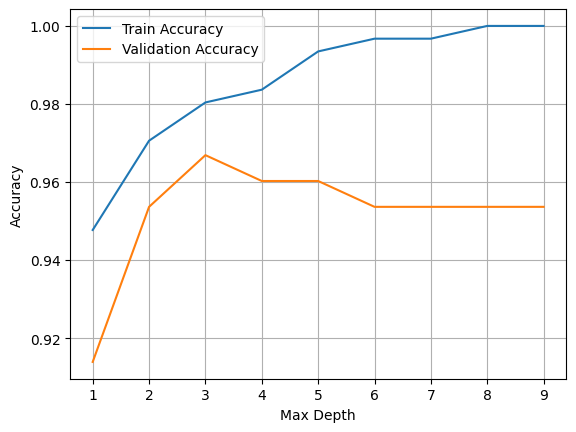

In [34]:
from cProfile import label
import matplotlib.pyplot  as plt
plt.plot(MaxDepthValues , train_acc , label="Train Accuracy")
plt.plot(MaxDepthValues , validation_acc , label="Validation Accuracy")
plt.grid(axis='both')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
best_model = DecisionTreeClassifier(max_depth=3 , random_state=2)
best_model.fit(x_train , y_train)    

DecisionTreeClassifier(max_depth=3, random_state=2)

In [29]:
y_predict_test = best_model.predict(x_test)
print(accuracy_score(y_test , y_predict_test))

0.9292035398230089


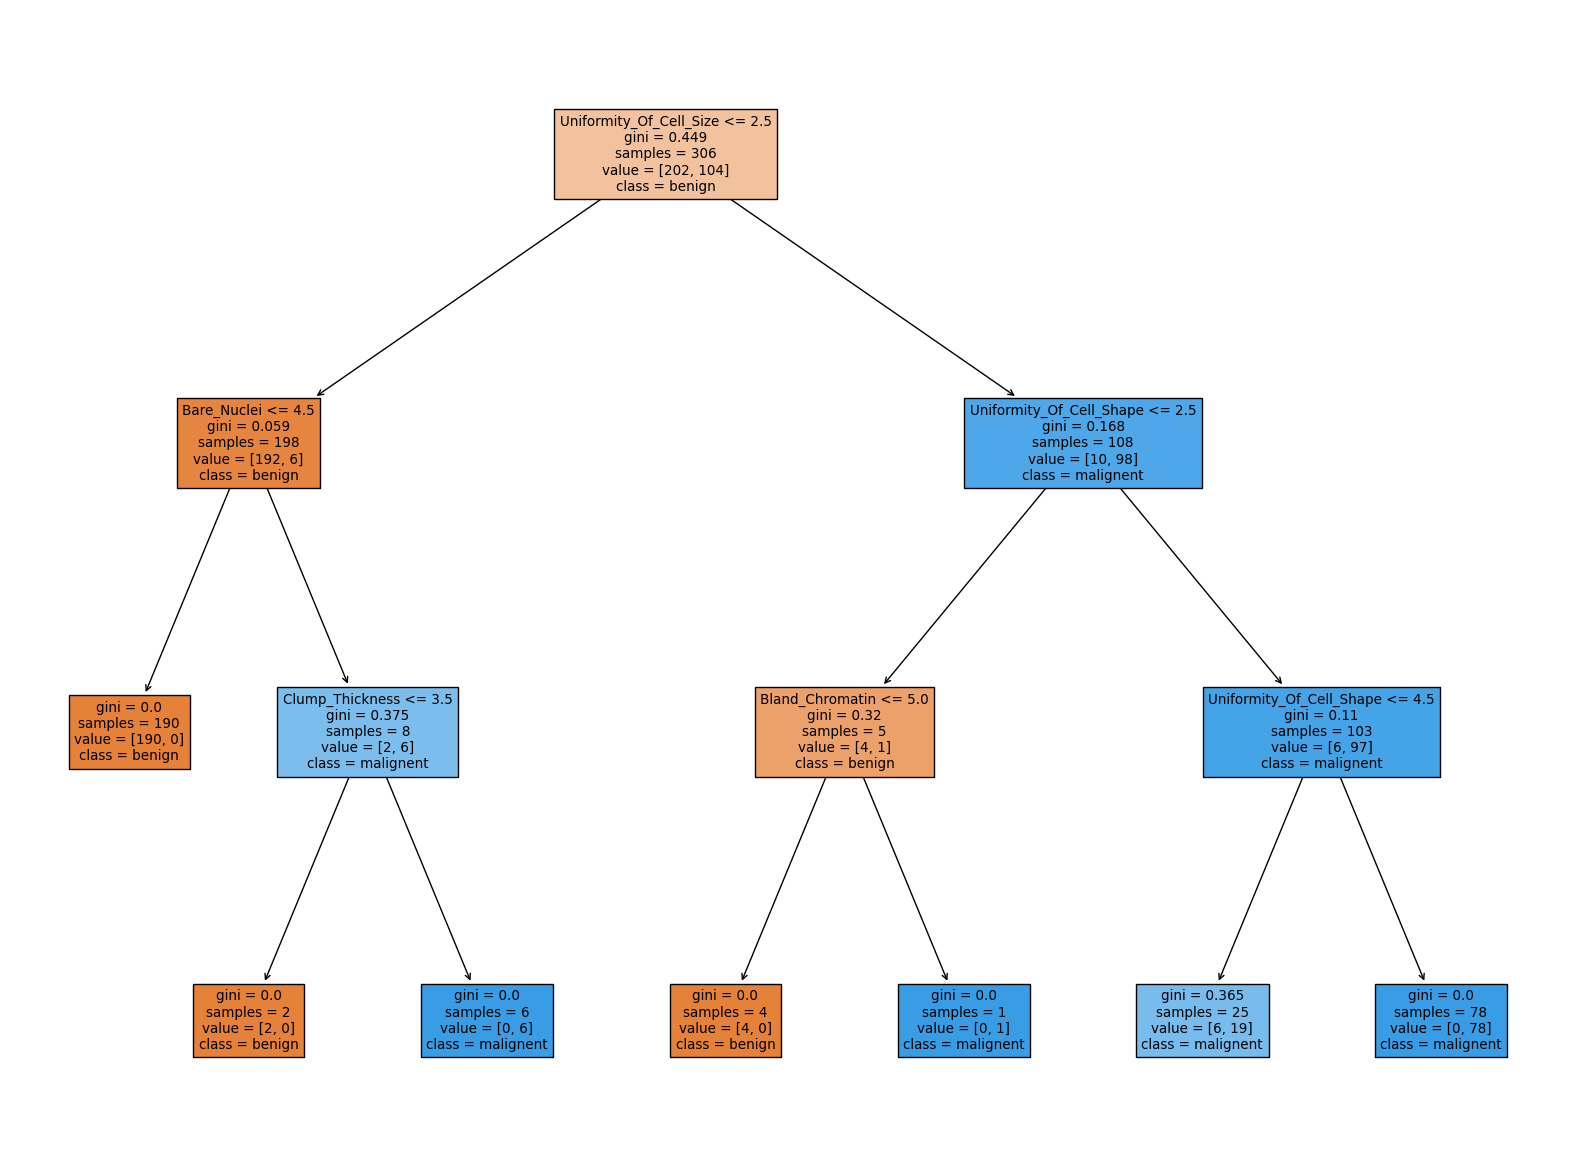

In [30]:
from sklearn import tree 
plt.figure(figsize=(20,15))
tree.plot_tree( best_model , 
feature_names=[
    'Clump_Thickness' , 'Uniformity_Of_Cell_Size',
    'Uniformity_Of_Cell_Shape' , 'Marginal_Adhesion' ,'Single_Epithelial_Cell_Size' ,
    'Bare_Nuclei' , 'Bland_Chromatin' , 'Normal_Nucleoli' , 'Mitoses',
],
class_names= ['benign' , 'malignent'],
filled=True
)
plt.show()

In [31]:
best_model.feature_importances_

array([0.02340327, 0.83879425, 0.05794766, 0.        , 0.        ,
       0.06737306, 0.01248175, 0.        , 0.        ])

Text(0.5, 1.0, 'Importance Feature')

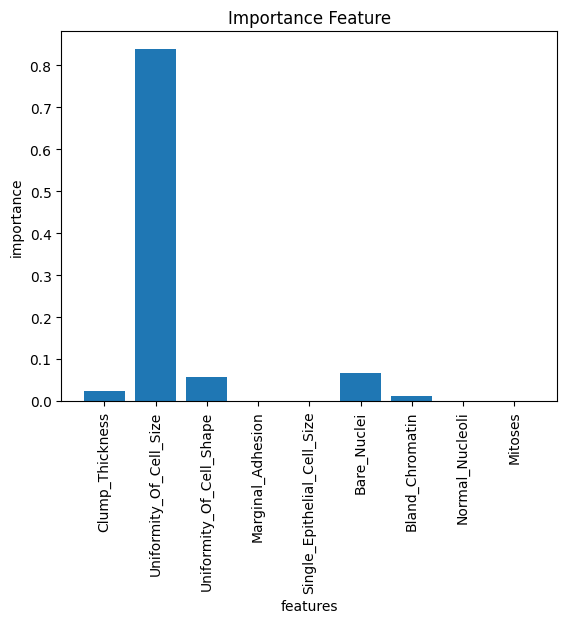

In [32]:
from cv2 import rotate
from matplotlib.pyplot import xlabel


feature_names=[
    'Clump_Thickness' , 'Uniformity_Of_Cell_Size',
    'Uniformity_Of_Cell_Shape' , 'Marginal_Adhesion' ,'Single_Epithelial_Cell_Size' ,
    'Bare_Nuclei' , 'Bland_Chromatin' , 'Normal_Nucleoli' , 'Mitoses',
]
plt.bar(feature_names , best_model.feature_importances_)
plt.xlabel('features')
plt.xticks(rotation=90)
plt.ylabel('importance')
plt.title("Importance Feature")